In [2]:
# import needed packages
import numpy as np
from model_code import utilities_visuals as ut
from model_code import utilities_simulation as us

from model_code import ArgModel as normal_am
from model_code import reducedArgModel as reduced_am

In [24]:
M = 4
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 100
    , "no_of_iterations": 10000
    # strength of biased processing
    , "ß": 3.2
    # number of implicitly modelled arguments
    , "M": M
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=M, normalised=True)
}

SPA_param = {
    'params_to_iter': np.array(['ß']),
    'sims_per_comb': 25,
    'boundaries': np.array([[0,5]]),
    'no_of_steps': np.array([11])
}

In [25]:
measures = {
    "time_until_consens": -1
    #, "mean_attitude_END_VALUE": 0
    #, "variance_attitude_END_VALUE": 0
}
measures_from_SPA_normal = normal_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)
%store measures_from_SPA_normal

[0.]
[0.5]
[1.]
[1.5]
[2.]
[2.5]
[3.]
[3.5]
[4.]
[4.5]
[5.]
Stored 'measures_from_SPA_normal' (list)


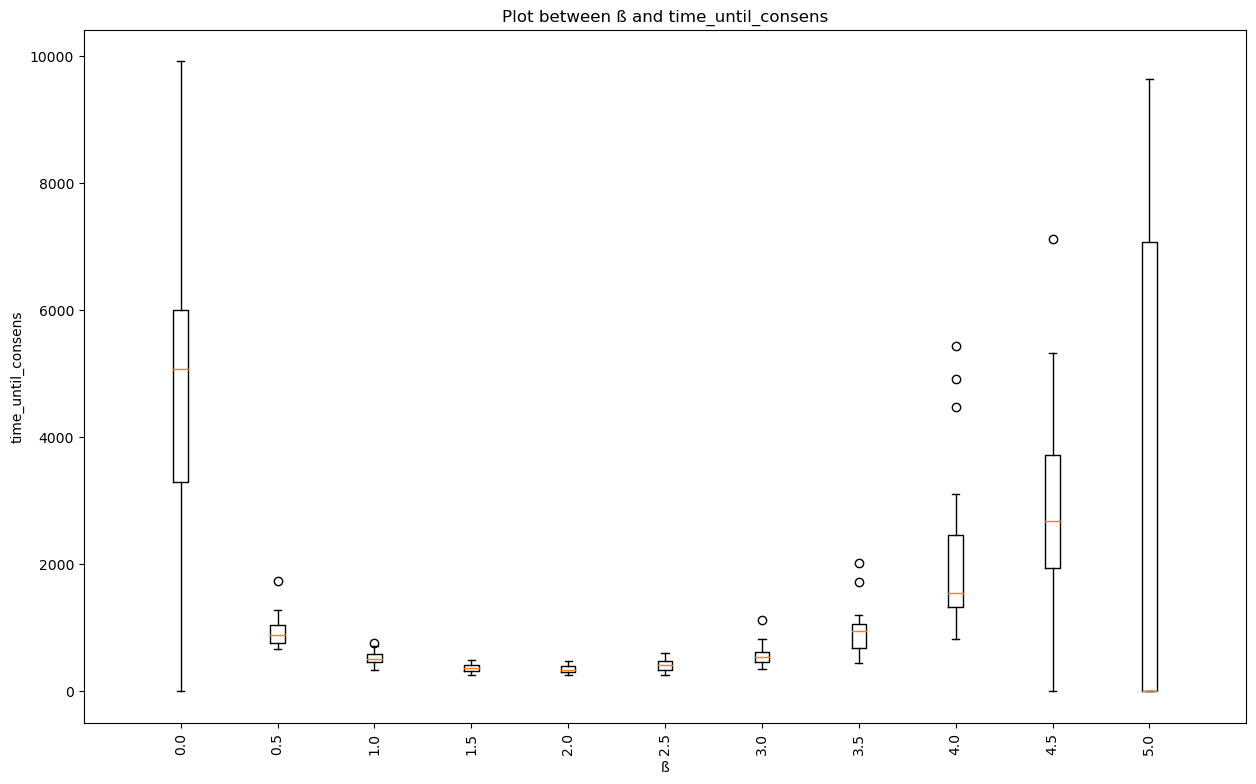

In [26]:
%store -r measures_from_SPA_normal
ut.xy_plot_measurement_boxplot('ß', 'time_until_consens', measures_from_SPA_normal)

In [27]:
measures = {
    "time_until_consens": -1
    #, "mean_attitude_END_VALUE": 0
    #, "variance_attitude_END_VALUE": 0
}
measures_from_SPA_reduced = reduced_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)
%store measures_from_SPA_reduced

[0.]
[0.5]
[1.]
[1.5]
[2.]
[2.5]
[3.]
[3.5]
[4.]
[4.5]
[5.]
Stored 'measures_from_SPA_reduced' (list)


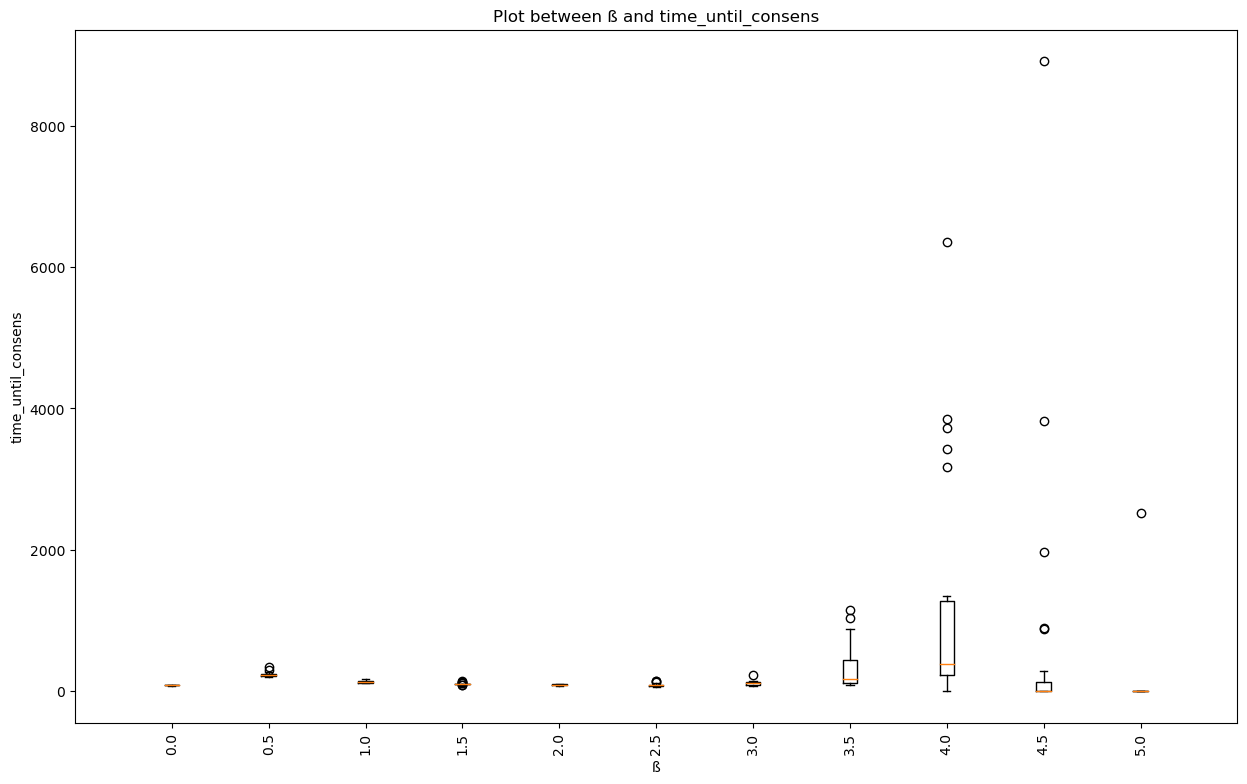

In [28]:
%store -r measures_from_SPA_reduced
ut.xy_plot_measurement_boxplot('ß', 'time_until_consens', measures_from_SPA_reduced)

In [17]:
measures_from_SPA_reduced_100agent = measures_from_SPA_reduced
%store measures_from_SPA_reduced_100agent

Stored 'measures_from_SPA_reduced_100agent' (list)


In [18]:
measures_from_SPA_normal_100agent = measures_from_SPA_normal
%store measures_from_SPA_normal_100agent

Stored 'measures_from_SPA_normal_100agent' (list)
